<a href="https://colab.research.google.com/github/DonaldTurton/iLab2/blob/master/Multi_Step_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multistep LSTM Ilab 2 "Morpheus"


# Libraries 

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

In [4]:
# Set seeds for numpy and tensorflow
tf.random.set_seed(12)
np.random.seed(12)

# Daily Data Set 

In [5]:
daily_data_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Merged_datasets/bit_eth_xrp_daily.csv"
daily_data = pd.read_csv (daily_data_url)
daily_data

,time,BTC_open,BTC_close,BTC_vol,ETHER_open,ETHER_close,ETHER_vol,XRP_open,XRP_close,XRP_vol
0,2017-05-19 00:00:00+00:00,1941.900000,1966.500000,23001.542773,98.550000,124.40,257956.362939,0.37999,0.32498,2.130933e+06
1,2017-05-20 00:00:00+00:00,1966.500000,2059.300000,21690.022393,124.490000,123.03,122882.371427,0.32499,0.34716,3.608873e+06
2,2017-05-21 00:00:00+00:00,2059.300000,2026.600000,17221.878675,123.490000,146.14,220184.308469,0.34700,0.32700,2.597807e+06
3,2017-05-22 00:00:00+00:00,2027.000000,2087.300000,57231.824243,146.140000,154.92,473706.454399,0.32700,0.29717,6.474949e+06
4,2017-05-23 00:00:00+00:00,2087.300000,2249.600000,22521.559138,155.160000,168.24,144988.858583,0.29912,0.32158,3.255225e+06
...,...,...,...,...,...,...,...,...,...,...
1169,2020-07-31 00:00:00+00:00,11122.785171,11350.000000,5830.145883,335.360000,346.82,145813.101733,0.24461,0.25983,1.913230e+07
1170,2020-08-01 00:00:00+00:00,11350.000000,11804.744013,10574.542594,346.814955,387.15,214176.492612,0.25970,0.29103,5.774864e+07
1171,2020-08-02 00:00:00+00:00,11805.000000,11053.772562,13217.636459,387.030000,371.87,322415.937958,0.29127,0.28764,9.968299e+07
1172,2020-08-03 00:00:00+00:00,11058.838777,11226.521728,4085.500508,372.060418,385.68,126895.684080,0.28792,0.30974,4.432413e+07


# Univariate Multistep LSTM


https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

## Data Partitioning 

In [6]:
data = daily_data

# Isolate the BTC price for the univariate model  
#data_seq = data.BTC_close

## Data Partitioning

In [7]:
len(data)

1174

In [8]:
data[1133:1161]

,time,BTC_open,BTC_close,BTC_vol,ETHER_open,ETHER_close,ETHER_vol,XRP_open,XRP_close,XRP_vol
1133,2020-06-25 00:00:00+00:00,9305.200000,9257.034669,5545.253350,234.680000,232.690000,54495.200452,0.18358,0.18171,7.412487e+06
1134,2020-06-26 00:00:00+00:00,9257.034669,9173.100000,3690.819849,232.690000,229.820000,34442.620990,0.18154,0.18269,5.504637e+06
1135,2020-06-27 00:00:00+00:00,9173.200000,9015.300000,3371.534670,229.830000,221.130000,56774.993873,0.18278,0.17521,1.099726e+07
1136,2020-06-28 00:00:00+00:00,9014.800000,9125.366022,2110.236421,221.030000,225.320000,37340.470225,0.17516,0.17704,6.910082e+06
1137,2020-06-29 00:00:00+00:00,9125.366022,9194.433851,3642.399036,225.120411,228.050000,30406.999118,0.17705,0.17733,5.560761e+06
1138,2020-06-30 00:00:00+00:00,9194.433851,9150.700000,1832.607917,228.070000,225.800711,16351.389819,0.17759,0.17569,3.531577e+06
1139,2020-07-01 00:00:00+00:00,9150.646722,9239.900000,2192.376952,225.880000,231.309557,35613.516370,0.17531,0.17666,4.184971e+06
1140,2020-07-02 00:00:00+00:00,9239.400000,9100.000000,3791.416126,231.290000,226.568972,44597.721846,0.17674,0.17493,7.941520e+06
1141,2020-07-03 00:00:00+00:00,9100.100000,9073.200000,1086.501913,226.660000,225.330000,12157.182254,0.17478,0.17656,4.648590e+06
1142,2020-07-04 00:00:00+00:00,9073.200000,9147.700000,1115.809786,225.210000,229.600000,14858.106324,0.17642,0.17834,3.441573e+06


In [8]:
# We will train on first 1153 and test on last 14, ie, 7 steps in and 7 steps out
train = data[0:1132]
test = data[1133:1161]


train = list(train.BTC_close)
test = list(test.BTC_close)

In [10]:
# THIS IS FOR THE MULTI-STEP OUTPUT APPROACH


# multi-step data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence for TRAIN
train_seq = train
# choose a number of time steps
n_steps_in, n_steps_out = 14, 14
# split into samples
X_train, y_train = split_sequence(train_seq, n_steps_in, n_steps_out)
# summarize the data


# define input sequence for TEST
test_seq = test
# choose a number of time steps
n_steps_in, n_steps_out = 14, 14
# split into samples
X_test, y_test = split_sequence(test_seq, n_steps_in, n_steps_out)
# summarize the data

# for i in range(len(X)):
# 	print(X[i], y[i])

In [11]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# Stacked LSTM Model



In [14]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers

# optimiser
#optimizer = optimizers.Adam(0.0001)

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
#model.compile(optimizer=optimizer, loss='mse')

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Use early stopping, change patience as required
early_stopping = EarlyStopping(monitor='val_loss', patience=50,verbose=1)
# Use reduce LR, change patience and factor as required
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)


learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss='mse')

In [16]:
from time import time
import time
# Fit model
tic = time.perf_counter()

#model.fit(X_train, y_train, epochs=100, validation_split=0.2) #VALIDATION SPLIT???



# Change epochs as necessary
history = model.fit(
    X_train,
    y_train, 
    epochs=100,
    validation_split=0.2,
    callbacks = [early_stopping, reduce_lr])



toc = time.perf_counter()
run_time = (toc-tic)/60
print(f'Model ran in: {run_time:0.2f} minutes')

Epoch 1/100
28/28 [==============================] - 1s 24ms/step - loss: 21448728.0000 - val_loss: 4754290.0000
Epoch 2/100
28/28 [==============================] - 0s 14ms/step - loss: 5386676.5000 - val_loss: 1755110.2500
Epoch 3/100
28/28 [==============================] - 0s 13ms/step - loss: 2761877.2500 - val_loss: 1565243.6250
Epoch 4/100
28/28 [==============================] - 0s 13ms/step - loss: 2874621.7500 - val_loss: 1581373.8750
Epoch 5/100
28/28 [==============================] - 0s 13ms/step - loss: 2583612.5000 - val_loss: 1654533.3750
Epoch 6/100
28/28 [==============================] - 0s 13ms/step - loss: 4887355.0000 - val_loss: 6340360.5000
Epoch 7/100
28/28 [==============================] - 0s 13ms/step - loss: 4298088.0000 - val_loss: 1847580.0000
Epoch 8/100
28/28 [==============================] - 0s 13ms/step - loss: 2417744.5000 - val_loss: 1345247.8750
Epoch 9/100
28/28 [==============================] - 0s 14ms/step - loss: 2255711.2500 - val_loss: 1420

### Model Evaluation

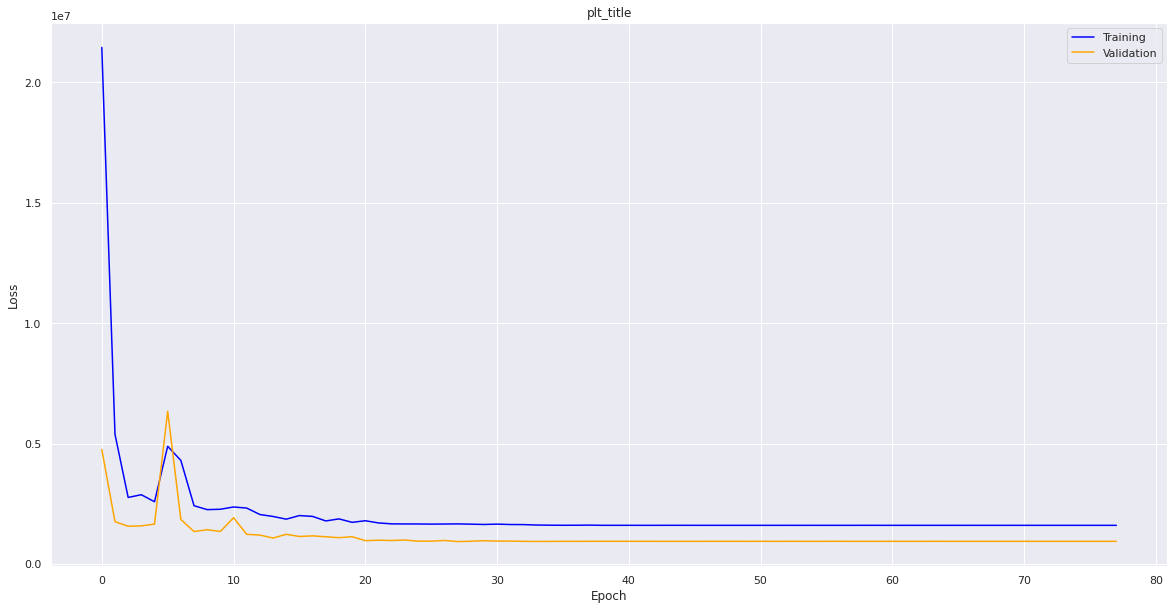

In [17]:
# Plot training Process 

plt.plot(history.history['loss'], label='Training', color = 'blue')
plt.plot(history.history['val_loss'], label='Validation', color = 'orange')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("plt_title")
plt.legend()
plt.show()

### Prediction Evaluation

In [18]:
# Create the predictions data frame
yhat_stacked = pd.DataFrame(np.reshape(np.array(model.predict(X_test, verbose=0)), (14,1))) 

yhat_stacked.columns = ['predictions']

In [19]:
# Create the test set data frame
y_test = pd.DataFrame(np.reshape(np.array(y_test), (14,1)))

y_test.columns = ['real']

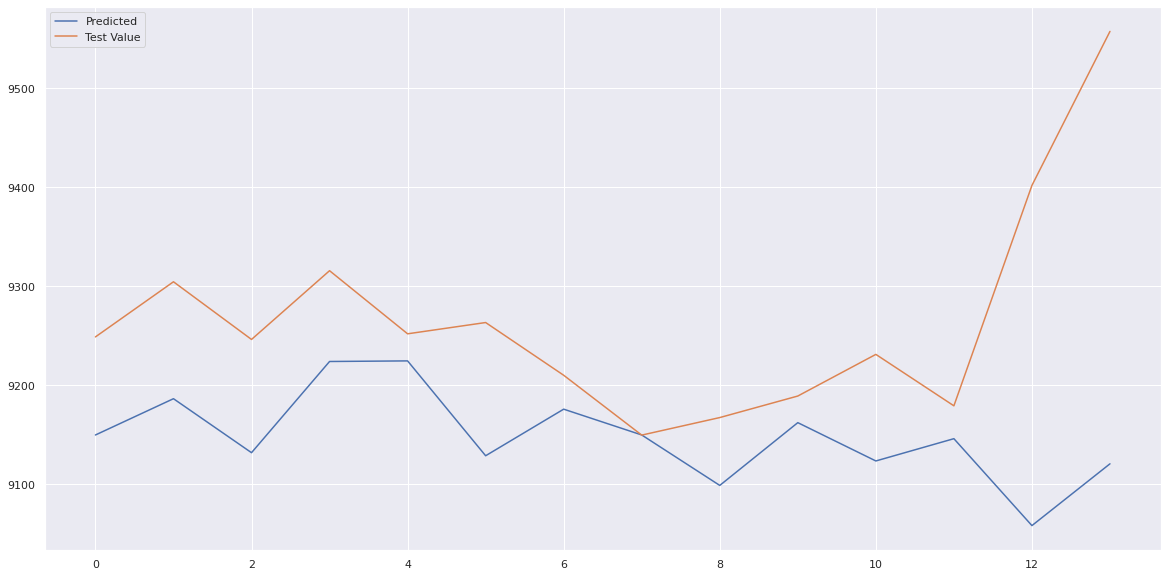

In [20]:
# Plot the predictions against the truth
plt.plot(yhat_stacked.index, yhat_stacked.predictions, label='Predicted')
plt.plot(y_test.index, y_test.real,label='Test Value')
plt.legend()
plt.show()


In [21]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(yhat_stacked.predictions, y_test.real)

rmse_val

167.515221098868

# Enconder Decoder Univariate Multistep LSTM


# Model

In [47]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [48]:
#Define the same modelling procure as the multi-step univariate LSTM, but include the RepeatVector function between each LSTM layer
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
#model.compile(optimizer='adam', loss='mse')

In [49]:
#Set Callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Use early stopping, change patience as required
early_stopping = EarlyStopping(monitor='val_loss', patience=50,verbose=1)
# Use reduce LR, change patience and factor as required
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)


learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate = learning_rate)


model.compile(optimizer=optimizer, loss='mse')

In [50]:
# fit model
#model.fit(X_train, y_train, epochs=100, validation_split=0.2)

from time import time
import time
# Fit model
tic = time.perf_counter()

#model.fit(X_train, y_train, epochs=100, validation_split=0.2) #VALIDATION SPLIT???



# Change epochs as necessary
history = model.fit(
    X_train,
    y_train, 
    epochs=100,
    validation_split=0.2,
    callbacks = [early_stopping, reduce_lr])



toc = time.perf_counter()
run_time = (toc-tic)/60
print(f'Model ran in: {run_time:0.2f} minutes')

Epoch 1/100


ValueError: ignored

## Model Evaluation

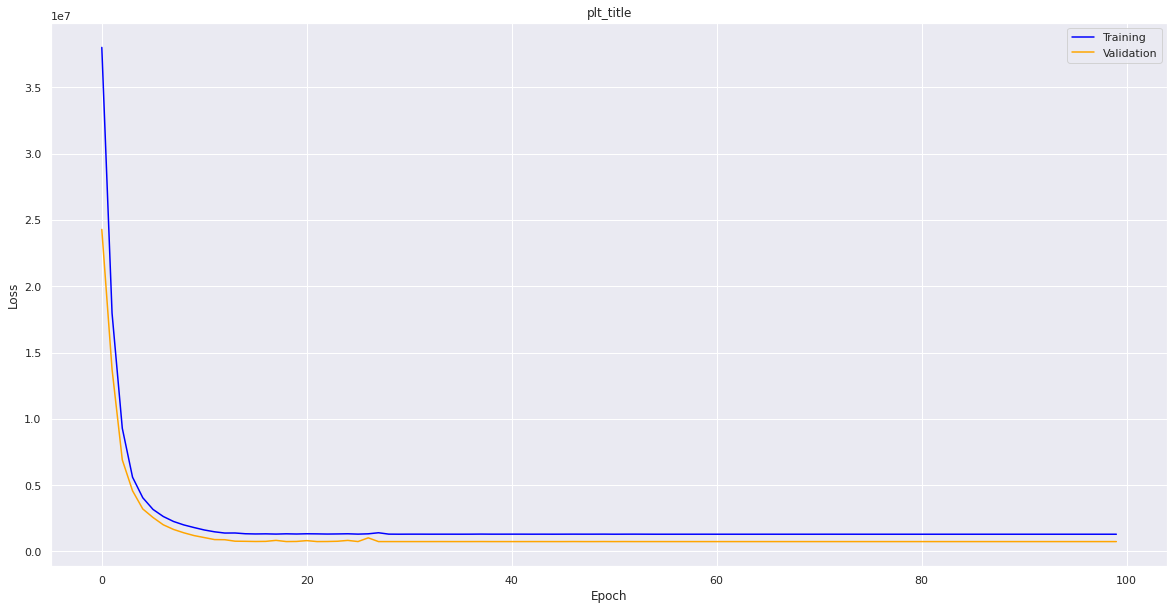

In [26]:
# Plot training Process 

plt.plot(history.history['loss'], label='Training', color = 'blue')
plt.plot(history.history['val_loss'], label='Validation', color = 'orange')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("plt_title")
plt.legend()
plt.show()

## Prediction Evaluation

In [27]:
# Create the predictions data frame
yhat_ED = pd.DataFrame(np.reshape(np.array(model.predict(X_test, verbose=0)), (14,1)))

yhat_ED.columns = ['predictions']

In [31]:
yhat_ED

,predictions
0,9376.197266
1,9380.554688
2,9378.771484
3,9339.145508
4,9339.281250
5,9339.281250
6,9339.281250
7,9339.281250
8,9339.281250
9,9339.281250


In [28]:
# Create the test set data frame
y_test = pd.DataFrame(np.reshape(np.array(y_test), (14,1)))

y_test.columns = ['real']

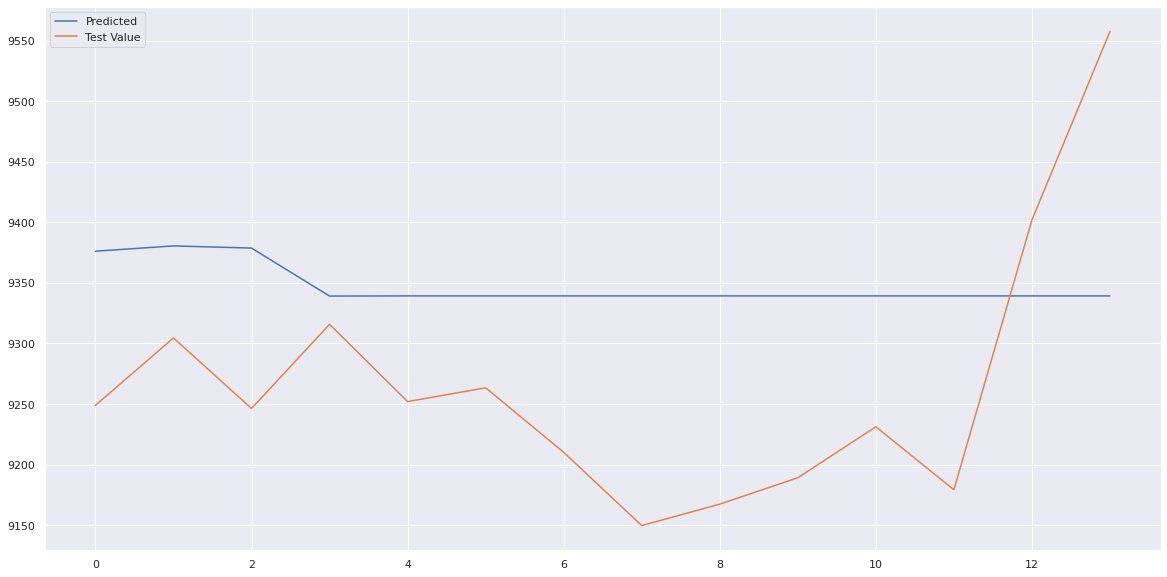

In [29]:
# Plot the predictions against the truth

plt.plot(yhat_ED.index, yhat_ED.predictions, label='Predicted')
plt.plot(y_test.index, y_test.real,label='Test Value')
plt.legend()
plt.show()

In [32]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(yhat_ED.predictions, y_test.real)

rmse_val

132.87747137813028

# CNN LSTM

In [33]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [95]:
# define input sequence for TRAIN
train_seq = train
# choose a number of time steps
n_steps_in, n_steps_out = 14, 14

# split into samples
X_train, y_train = split_sequence(train_seq, n_steps_in, n_steps_out)



# SAME CODE AS BEFORE FOR TEST 
# define input sequence for TEST
test_seq = test
# choose a number of time steps
n_steps_in, n_steps_out = 14, 14
# split into samples
X_test, y_test = split_sequence(test_seq, n_steps_in, n_steps_out)
# summarize the data


In [100]:
# NEW CODE FOR CNN LSTM
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2    #2 Subsambples
n_steps = 7  # 2 subsamples of 7 steps 

X_train = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))

In [101]:
train[1104:1132]

[9210.29871677,
 9589.3,
 9426.1,
 9706.4,
 9451.1,
 10225.97600025,
 9526.96808253,
 9676.6,
 9790.700076,
 9620.4,
 9668.4,
 9747.1,
 9784.4,
 9771.9,
 9898.8,
 9272.2,
 9468.3,
 9480.87818464,
 9344.75144536,
 9435.0,
 9534.401723,
 9473.4,
 9400.0,
 9315.5,
 9371.3,
 9301.0,
 9697.72816498,
 9635.2]

In [102]:
X_train[-1]

array([[[ 9210.29871677],
        [ 9589.3       ],
        [ 9426.1       ],
        [ 9706.4       ],
        [ 9451.1       ],
        [10225.97600025],
        [ 9526.96808253]],

       [[ 9676.6       ],
        [ 9790.700076  ],
        [ 9620.4       ],
        [ 9668.4       ],
        [ 9747.1       ],
        [ 9784.4       ],
        [ 9771.9       ]]])

In [104]:
y_train[-1]

array([9898.8       , 9272.2       , 9468.3       , 9480.87818464,
       9344.75144536, 9435.        , 9534.401723  , 9473.4       ,
       9400.        , 9315.5       , 9371.3       , 9301.        ,
       9697.72816498, 9635.2       ])

In [36]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features))) # n_steps_in, n_features
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out)) #Multistep  previosly =  (1)
#model.compile(optimizer='adam', loss='mse')

In [37]:
#Set Callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras import optimizers

# Use early stopping, change patience as required
early_stopping = EarlyStopping(monitor='val_loss', patience=50,verbose=1)
# Use reduce LR, change patience and factor as required
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)


learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate = learning_rate)


model.compile(optimizer=optimizer, loss='mse')

In [38]:
# fit model
#model.fit(X_train, y_train, epochs=100, validation_split=0.2)


from time import time
import time
# Fit model
tic = time.perf_counter()

#model.fit(X_train, y_train, epochs=100, validation_split=0.2) #VALIDATION SPLIT???



# Change epochs as necessary
history = model.fit(
    X_train,
    y_train, 
    epochs=100,
    validation_split=0.2,
    callbacks = [early_stopping, reduce_lr])



toc = time.perf_counter()
run_time = (toc-tic)/60
print(f'Model ran in: {run_time:0.2f} minutes')


Epoch 1/100
28/28 [==============================] - 0s 11ms/step - loss: 24926536.0000 - val_loss: 3022250.0000
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 2510403.2500 - val_loss: 1368117.7500
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 1943203.5000 - val_loss: 1074371.7500
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 1891366.7500 - val_loss: 1039907.3125
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 1858583.6250 - val_loss: 1209019.6250
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 1822214.6250 - val_loss: 1366176.7500
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 2051912.2500 - val_loss: 1062340.2500
Epoch 8/100
28/28 [==============================] - 0s 4ms/step - loss: 1757911.0000 - val_loss: 960994.9375
Epoch 9/100
28/28 [==============================] - 0s 4ms/step - loss: 1679969.7500 - val_loss: 1155266.3750


### Model Evaluation

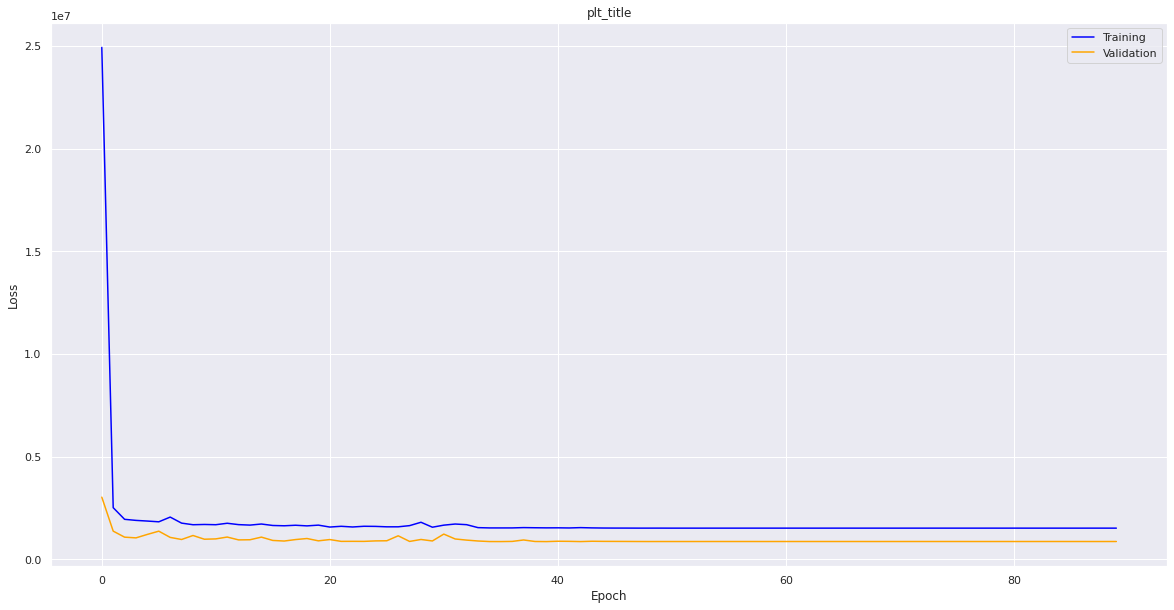

In [39]:
# Plot training Process 

plt.plot(history.history['loss'], label='Training', color = 'blue')
plt.plot(history.history['val_loss'], label='Validation', color = 'orange')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("plt_title")
plt.legend()
plt.show()

### Prediction Evaluation

In [40]:
#Get X test into the right shape
X_test=X_test.reshape((1, n_seq, n_steps, n_features))

#Precidt
yhat_CNN_LSTM = model.predict(X_test, verbose=0)

In [28]:
# Create the predictions data frame


#yhat = model.predict(X_test, verbose=0)

#yhat = pd.DataFrame(np.reshape(np.array(model.predict(X_test, verbose=0)), (2, 7, 1)))
#yhat.columns = ['predictions']




#Stacked
# # fit model
# model.fit(X, y, epochs=200, verbose=0)
# # demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)


#CNN
# ## fit model
# model.fit(X, y, epochs=500, verbose=0)
# # demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

#Multistep
# # fit model
# model.fit(X, y, epochs=50, verbose=0)
# # demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

#mio
# # Create the predictions data frame
# yhat = pd.DataFrame(np.reshape(np.array(model.predict(X_test, verbose=0)), (7,1)))

# yhat.columns = ['predictions']

In [41]:
yhat_CNN_LSTM = pd.DataFrame(yhat_CNN_LSTM)

In [42]:
yhat_CNN_LSTM = yhat_CNN_LSTM.T
yhat_CNN_LSTM.columns = ['predictions']

,predictions
0,9119.376953
1,9134.636719
2,9137.584961
3,9151.991211
4,9087.424805
5,9141.284180
6,9103.019531
7,9101.950195
8,9089.622070
9,9060.884766


In [43]:
# Create the test set data frame
y_test = pd.DataFrame(np.reshape(np.array(y_test), (14,1)))

y_test.columns = ['real']

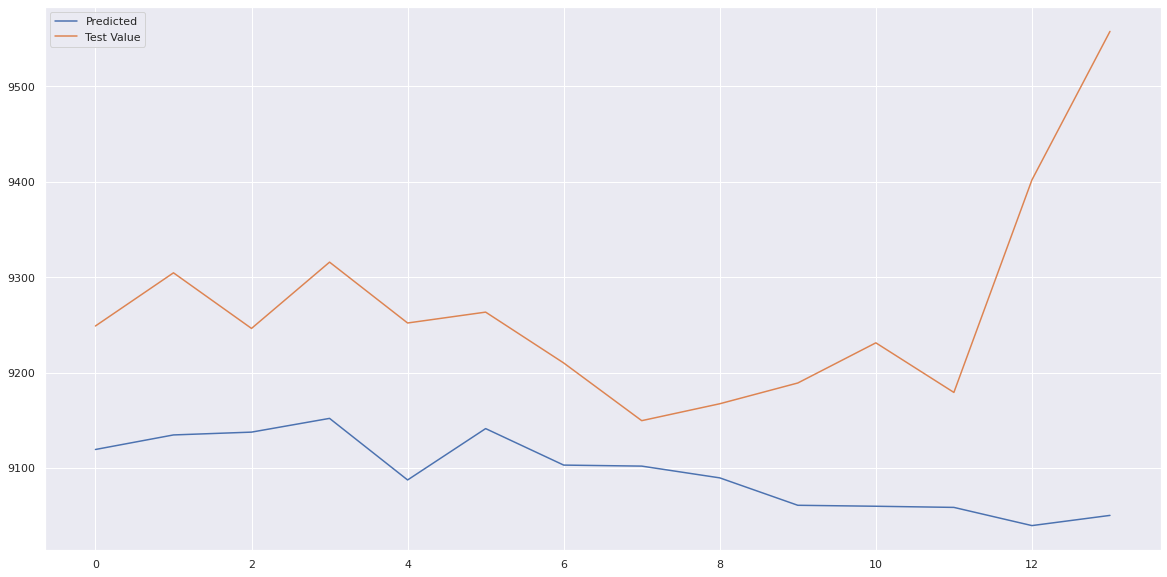

In [44]:
# Plot the predictions against the truth

plt.plot(yhat_CNN_LSTM.index, yhat_CNN_LSTM.predictions, label='Predicted')
plt.plot(y_test.index, y_test.real,label='Test Value')
plt.legend()
plt.show()

In [45]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(yhat_CNN_LSTM.predictions, y_test.real)

rmse_val

206.19254640594195

# Model Comparisson

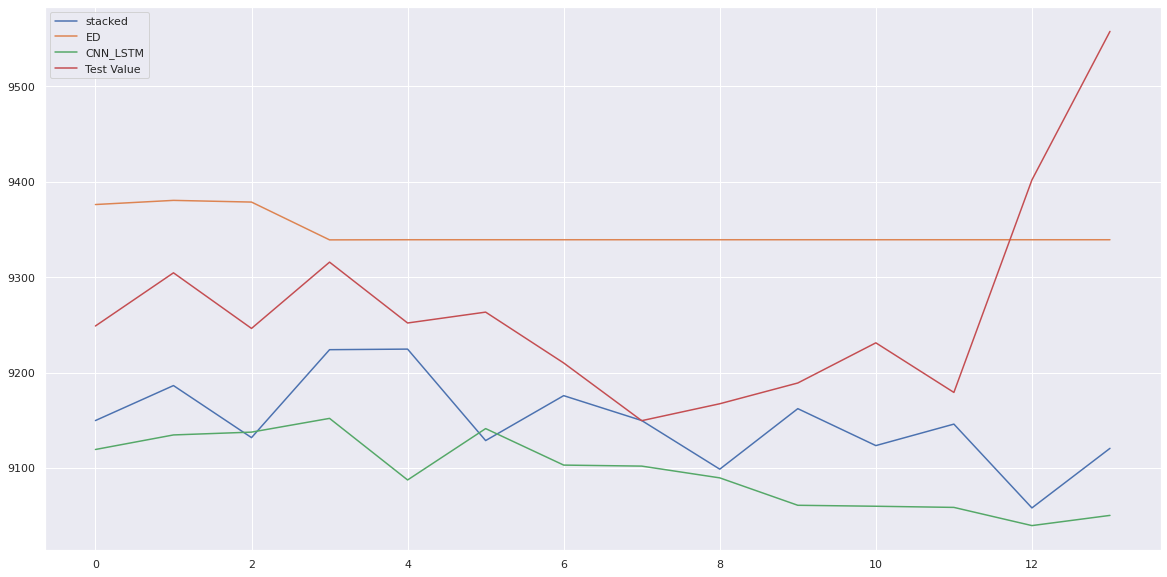

In [46]:
plt.plot(yhat_stacked.index, yhat_stacked.predictions, label='stacked')
plt.plot(yhat_ED.index, yhat_ED.predictions, label='ED')
plt.plot(yhat_CNN_LSTM.index, yhat_CNN_LSTM.predictions, label='CNN_LSTM')
plt.plot(y_test.index, y_test.real,label='Test Value')
plt.legend()
plt.show()

# Multistep (printing rmse) DONALD

https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

## Evaluation Metric

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

## Train and Test Sets 

In [ ]:
# First Day in the data (2017-05-19) FIRST SUNDAY IN DATA SET 2017-05-21 
# Last day in the data (2020-08-04) LAST SATURDAY IN DATA SET 2020-08-01
data = daily_data[2:1171] #Subset for exact weeks 
data.index = np.arange(len(data)) #restart index in 0
data

,time,BTC_open,BTC_close,BTC_vol,ETHER_open,ETHER_close,ETHER_vol,XRP_open,XRP_close,XRP_vol
0,2017-05-21 00:00:00+00:00,2059.300000,2026.600000,17221.878675,123.490000,146.140000,220184.308469,0.34700,0.32700,2.597807e+06
1,2017-05-22 00:00:00+00:00,2027.000000,2087.300000,57231.824243,146.140000,154.920000,473706.454399,0.32700,0.29717,6.474949e+06
2,2017-05-23 00:00:00+00:00,2087.300000,2249.600000,22521.559138,155.160000,168.240000,144988.858583,0.29912,0.32158,3.255225e+06
3,2017-05-24 00:00:00+00:00,2249.200000,2395.500000,29620.827843,168.250000,183.880000,184596.677902,0.32000,0.28860,4.288168e+06
4,2017-05-25 00:00:00+00:00,2395.500000,2268.100000,55075.881722,183.880000,168.710000,246730.476672,0.28860,0.23820,8.004758e+06
...,...,...,...,...,...,...,...,...,...,...
1164,2020-07-28 00:00:00+00:00,11044.322158,10932.000000,9878.589053,322.400000,317.510000,123463.829069,0.22470,0.23070,2.474899e+07
1165,2020-07-29 00:00:00+00:00,10931.558415,11117.000000,8822.499030,317.460000,318.460000,118426.367772,0.23085,0.24370,2.929134e+07
1166,2020-07-30 00:00:00+00:00,11117.395121,11123.000000,4250.910082,318.460000,335.428724,89569.975403,0.24375,0.24462,1.810977e+07
1167,2020-07-31 00:00:00+00:00,11122.785171,11350.000000,5830.145883,335.360000,346.820000,145813.101733,0.24461,0.25983,1.913230e+07


In [ ]:
# We want to split the data in week from sunday to saturday 
# First Day in the data (2017-05-19) FIRST SUNDAY IN DATA SET 2017-05-21 
# Last day in the data (2020-08-04) LAST SATURDAY IN DATA SET 2020-08-01
len(data)

1169

In [ ]:
from numpy import split
from numpy import array

#We want 6 month for testing 

# split a univariate dataset into train/test sets
def split_dataset(data):
  # split into standard weeks
  train, test = data[1:-167], data[-168:]  
  #train, test = data[:-165], data[-166:] 
	# restructure into windows of weekly data
  train = array(np.split(train, len(train)/7))
  test  = array(np.split(test , len(test)/7))
  return train, test

In [ ]:
train, test = split_dataset(data.values)

# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

#train 143 weeks ... test 24weeks 
# [samples, timesteps, features]

(143, 7, 10)
2017-05-22 00:00:00+00:00 2020-02-16 00:00:00+00:00
(24, 7, 10)
2020-02-16 00:00:00+00:00 2020-08-01 00:00:00+00:00


## WALK- FORWWARD VALIDATION

This is where a model is required to make a one week prediction, then the actual data for that week is made available to the model so that it can be used as the basis for making a prediction on the subsequent week. This is both realistic for how the model may be used in practice and beneficial to the models allowing them to make use of the best available data.

In [ ]:

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

In [ ]:
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

## Univariate Multi_Step Forecasting

In [ ]:
data = data [["BTC_close"]] #Subset for Bitcoin

#New Split 
train, test = split_dataset(data.values)

# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

#train 143 weeks ... test 24weeks 
# [samples, timesteps, features]

(143, 7, 1)
2087.3 9926.8
(24, 7, 1)
9926.8 11804.7440126


In [ ]:
#A way to create a lot more training data is to change the problem during training to predict the next seven days given the prior seven days, regardless of the standard week.
#takes a list of weeks (history) and the number of time steps to use as inputs and outputs and returns the data in the overlapping moving window format.

def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2])) #flatten data 
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

## LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM


# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 70, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

## Prepare data to forecast

In [ ]:
#tranform the data (flattens)
#Function takes as arguments the model fit on the training dataset, the history of data observed so far, and the number of input time steps expected by the model.

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2])) #flattens 
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]  
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

In [ ]:
# evaluate model and get scores
n_input = 7
#n_input = 14 for 14 days prior days 
score, scores = evaluate_model(train, test, n_input)

lstm: [837.033] 640.6, 613.9, 582.2, 634.8, 1089.5, 1016.8, 1074.4


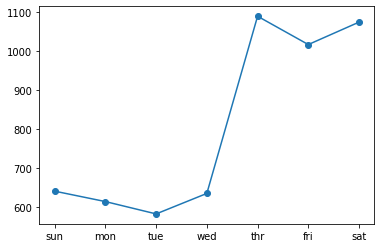

In [ ]:
from matplotlib import pyplot

# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat'] #I THINK IT IS ACTUALLY STARTING IN MONDAY____ SEE TRAIN PARTITIONING
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show() #A plot of the daily RMSE is also created.

Running the example fits and evaluates the model, printing the overall RMSE across all seven days, and the per-day RMSE for each lead time.



## Retreive predictions (DT)


In [ ]:
#code to retrarive the predictions 
n_input = 7
model_p = build_model(train, n_input)
history_p = [x for x in train]

In [ ]:
predicciones = forecast(model_p,history_p, n_input  )

In [ ]:
predicciones

array([9720.044 , 9595.529 , 9684.449 , 9652.378 , 9539.775 , 9574.243 ,
       9467.8955], dtype=float32)

In [ ]:
# predictions = list()

# for i in range(len(test)):
#   # predict the week
#   yhat_sequence = forecast(model_p, history_p, n_input)
#   # store the predictions
#   predictions.append(yhat_sequence)
#   # get real observation and add to history for predicting the next week
#   history.append(test[i, :])
#   # evaluate predictions days for each week
# predictions = array(predictions)

In [ ]:
#pred = predictions[1]

In [ ]:
#real = test[:, :, 0]
real = test[-1, :, 0] #select the last week (-1)
real

array([ 9948.4       , 11043.96287976, 10932.        , 11117.        ,
       11123.        , 11350.        , 11804.7440126 ])

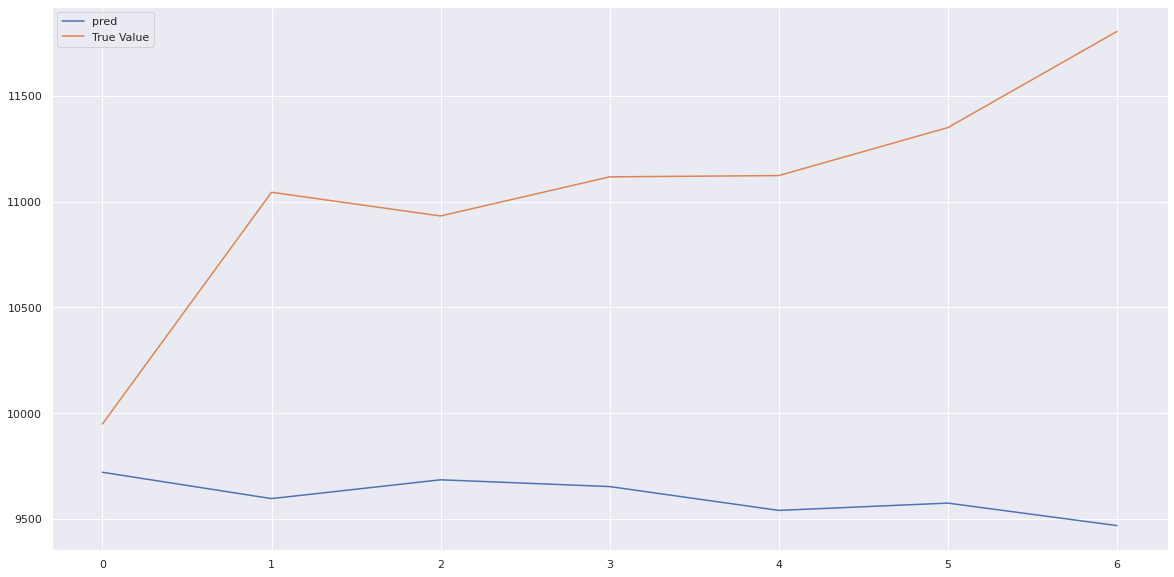

In [ ]:
# Train progress
plt.plot(predicciones, label='pred')
plt.plot(real ,label='True Value')
plt.legend()
plt.show()

In [ ]:
# evaluate a single model
def true_pred(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	actual_p, pred_p = (test[:, :, 0], predictions)
	return actual_p, predictions

In [ ]:
equis = true_pred(train, test, n_input)

In [ ]:
equis

(array([[ 9926.8       ,  9708.        , 10184.        ,  9592.3       ,
          9608.1       ,  9692.9       ,  9663.        ],
        [ 9985.        ,  9674.1       ,  9327.5       ,  8813.2       ,
          8825.6       ,  8728.        ,  8561.5       ],
        [ 8556.7       ,  8938.4       ,  8791.1       ,  8788.6       ,
          9090.8       ,  9180.6       ,  8919.        ],
        [ 8073.99728926,  7967.3       ,  7913.8       ,  7969.6       ,
          4873.1       ,  5625.7       ,  5218.2       ],
        [ 5383.2       ,  5058.5       ,  5339.1       ,  5416.2       ,
          6173.6       ,  6206.5       ,  6201.7       ],
        [ 5820.09678077,  6491.5       ,  6762.09308369,  6688.2       ,
          6751.9       ,  6370.        ,  6250.        ],
        [ 5892.7       ,  6407.6       ,  6427.68278638,  6675.        ,
          6810.7       ,  6740.8       ,  6880.1       ],
        [ 6780.2       ,  7340.2       ,  7202.99832851,  7367.        ,
          

## Encoder - Decoder 
